# Labeling the news with the dollar variation

Now we ave to label each news with the respective dollar variation

## Importing the libraries and loading the FastText model

In [71]:
import numpy as np
import pandas as pd
from tensorflow import keras

from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from gensim.models import KeyedVectors

word_vec_model = KeyedVectors.load_word2vec_format('../datasets/word-vectors/wiki.pt/wiki.pt.vec')

word_vec_model

import matplotlib.pyplot as plt 

W0829 14:49:04.393749 4606383552 doc2vec.py:74] Slow version of gensim.models.doc2vec is being used
W0829 14:49:04.469452 4606383552 smart_open_lib.py:385] this function is deprecated, use smart_open.open instead


## Importing and indexing the dollar dataframe

In [78]:
dolar_rates_df = pd.read_csv('../datasets/pre-processed/dolar_rates.csv')

dolar_rates_df = dolar_rates_df.set_index("quote_timestamp")

dolar_rates_df.tail(5)

,variation
quote_timestamp,
2019-06-28 10:02:17.893,down
2019-06-28 11:05:18.692,up
2019-06-28 12:06:28.871,down
2019-06-28 13:06:29.675,up
2019-06-28 13:06:29.684,down


## Importing and indexing the news dataframe

In [79]:
news_df = pd.read_csv('../datasets/pre-processed/news.csv')
news_df = news_df.set_index("date_published")

news_df.head(5)

,title
date_published,
2019-06-27 21:01:00,"desarticulação, pressão de partidos e lobby de..."
2019-06-27 07:54:00,pf prende assessores de ministro do turismo em...
2019-06-27 10:41:00,macron diz que não terá acordo com mercosul se...
2019-06-27 17:33:00,maia contém apreensão com atraso na previdênci...
2019-06-27 16:58:00,guedes defende estados na previdência para que...


## Reindexing the dollar dataframe by the nearest news timestamp

In [80]:
dolar_rates_df = dolar_rates_df.reindex(news_df.index, method='backfill')

dolar_rates_df = dolar_rates_df.loc[~dolar_rates_df.index.duplicated(keep='first')]

dolar_rates_df.head(10)

,variation
date_published,
2019-06-27 21:01:00,down
2019-06-27 07:54:00,up
2019-06-27 10:41:00,up
2019-06-27 17:33:00,down
2019-06-27 16:58:00,down
2019-06-27 10:11:00,up
2019-06-27 14:50:00,down
2019-06-27 18:11:00,down
2019-06-27 15:03:00,down


## Joining the two dataframes by their indexes

In [81]:
news_df = news_df.join(dolar_rates_df)
news_df = news_df.reset_index()
news_df = news_df.drop(['date_published'], axis=1)
news_df = news_df.dropna(subset=['variation'])

news_df.head(5)

,title,variation
0,meirelles encara eleição como última chance e ...,steady
1,candidato do prtb em sp defende máquina menor,down
2,"bank of america projeta dólar em r$ 5,50 depoi...",down
3,distanciamento de alckmin em são paulo esfria ...,down
4,indústria apresenta proposta de reforma tribut...,up


# Tokenizing the text

Transforming all the news texts into sequences of numbers

## Extracting the text from the dataframe

In [83]:
news_titles = news_df.drop(['variation'], axis = 1).to_numpy()
news_titles = np.squeeze(np.asarray(news_titles))
news_titles

array(['meirelles encara eleição como última chance e gasta fortuna para sair do 1%',
       'candidato do prtb em sp defende máquina menor',
       'bank of america projeta dólar em r$ 5,50 depois das eleições',
       ...,
       'maia contém apreensão com atraso na previdência e freia queda da bolsa',
       'doria dará a moro medalha que já foi entregue a citados na lava jato',
       'desarticulação, pressão de partidos e lobby de servidores emperram previdência'],
      dtype=object)

## Transforming all the texts into sequences of tokens

In [84]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_titles)

sequences = tokenizer.texts_to_sequences(news_titles)

sequences

[[347, 3343, 68, 42, 1720, 879, 3, 1721, 2223, 9, 450, 6, 86],
 [140, 6, 2224, 7, 83, 84, 2225, 476],
 [1390, 1391, 1392, 2226, 98, 7, 33, 245, 629, 768, 89, 422],
 [2227, 1, 59, 7, 70, 75, 2228, 231, 290, 11, 630, 170],
 [423, 880, 126, 1, 18, 451, 10, 366],
 [347, 17, 39, 79, 2229, 1, 47, 72, 881],
 [2, 84, 1180, 7, 161, 3, 4, 8, 517, 2230, 3344, 1722],
 [347, 569, 57, 3, 4, 8, 114, 1393, 92, 1181, 1723, 6, 12, 694],
 [88, 348, 47, 1, 3345, 3, 16, 3346, 24, 1724, 3347, 10, 18, 570],
 [59, 4, 8, 1394, 11, 20, 386, 45, 3348, 115, 171, 1, 1725],
 [110, 367, 3, 769, 1, 366, 14, 882],
 [2, 387, 208, 9, 2231, 57, 3, 4, 8, 1726, 16, 452, 8, 20, 518, 424],
 [170, 4, 8, 1004, 1727, 10, 127, 3, 770, 10, 88, 571],
 [200, 771, 10, 23, 1005, 7, 290, 10, 366],
 [56, 23, 3349, 10, 59, 3, 4, 8, 477, 291, 30, 1006, 14, 310, 453],
 [55, 3350, 200, 128, 23, 3351, 9, 1182, 209, 1, 2232],
 [3352, 182, 331, 232, 191, 2233, 11, 1183, 2234],
 [1728, 1, 3353, 3354, 2235, 2236, 3, 311, 6, 478, 9, 2237, 24, 12

# Padding the sequences to insure a default length

All the sequence should have the same length in order to feed it into the Neural Network, so we take the lenght of the longest sequence as our default length and pad all the other sequences to match that length.

In [85]:
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = len(max(sequences, key=len))
print('Number of unique words:', len(word_index))
print('Max sequence length: ', MAX_SEQUENCE_LENGTH)

features = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

features

Number of unique words: 6932
Max sequence length:  20


array([[   0,    0,    0, ...,  450,    6,   86],
       [   0,    0,    0, ...,   84, 2225,  476],
       [   0,    0,    0, ...,  768,   89,  422],
       ...,
       [   0,    0,    0, ...,  173,    5,   51],
       [   0,    0,    0, ...,   14,  107,  116],
       [   0,    0,    0, ...,  204, 2585,   15]], dtype=int32)

# Creating the embedding matrix

That matrix link the word token with the word vector representation in FastText. That matrix will be used to feed the Embedding layer of the neural network in order to pre load it with the FastText vectors.

In [105]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in word_index.items():
    try:
        embedding_vector = word_vec_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass
    
embedding_matrix.shape

(6933, 300)

# Extracting the labels

In [86]:
news_df['variation'] = news_df['variation'].apply(lambda variation: int(2) if variation == 'up' else (int(0) if variation == 'down' else int(1)))
labels = news_df[['variation']].to_numpy()

labels

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Plotting the classes distribution accross the dataset

(array([2103.,    0.,    0.,    0.,    0.,   38.,    0.,    0.,    0.,
        2073.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

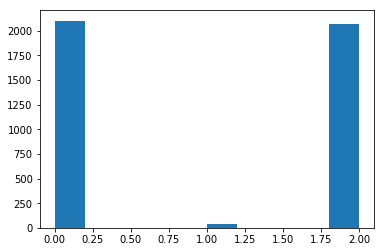

In [87]:
plt.hist(labels)

# Saving the final datasets into files

In [106]:
np.savetxt("../datasets/final-data/features.csv", features, delimiter=",")
np.savetxt("../datasets/final-data/labels.csv", labels, delimiter=",")
np.savetxt('../datasets/final-data/embedding_matrix.csv', embedding_matrix, delimiter=',')